In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data = df[["airline_sentiment","text"]]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [4]:
y = df['airline_sentiment']
X = df['text']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
tfdif = TfidfVectorizer(stop_words='english')
tfdif.fit(X_train)

TfidfVectorizer(stop_words='english')

In [8]:
X_train_tfidf =  tfdif.transform(X_train)
X_test_tfidf = tfdif.transform(X_test)

In [9]:
#給定特徵 X（例如一段文字），預測它的標籤 y（例如情緒正面或負面）。
#整份文件中，某個詞如果在負面情緒的訓練資料中常出現、重要性高，
#那未來看到這個詞時，模型就會偏向判它為負面。
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)#由文字權重 推算情緒

MultinomialNB()

In [10]:
tes = tfdif.transform(["@SouthwestAir thanks! Very "])
preds = nb.predict(tes)
preds
print(X_test.iloc[0])
print(preds)

@SouthwestAir thanks! Very excited to see it :D
['positive']


我們將使用“Palmer Penguins”數據集，這個數據集足夠簡單，可以幫助我們完全理解超參數改變如何影響分類結果。

<img src="penguin.jpg" style="max-width:400px">
些數據由Dr. Kristen Gorman和Palmer Station，南極LTER（一個長期生態研究網絡的成員）收集並提供。

Gorman KB, Williams TD, Fraser WR (2014) 《Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis)》。PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081



* penguins_size.csv：簡化的數據來自原始企鵝數據集。包含變量：

    * species：企鵝物種（帽帶企鵝、阿德利企鵝或紐帶企鵝）
    * culmen_length_mm：嘴峰長度（毫米）
    * culmen_depth_mm：嘴峰深度（毫米）
    * flipper_length_mm：鰭長度（毫米）
    * body_mass_g：體重（克）
    * island：在Palmer群島（南極洲）的島嶼名稱（Dream, Torgersen或Biscoe）
    * sex：企鵝性別

註：嘴峰是“鳥喙的上脊”

**我們的目標是創建一個模型，該模型可以根據物理屬性幫助預測企鵝的物種，然後我們可以使用該模型幫助研究人員在現場分類企鵝，而無需經驗豐富的生物學家**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("penguins_size.csv")

In [13]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [14]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
df = df.dropna()
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [16]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [17]:
df = df[df["sex"] != '.']

In [18]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

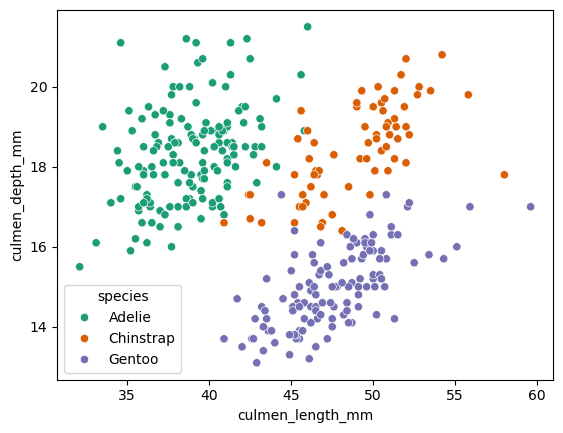

In [19]:
sns.scatterplot(x="culmen_length_mm",y='culmen_depth_mm',data=df,hue="species",palette="Dark2")

In [ ]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=1 )#get_dummies One-Hot Encoding
y = df['species']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
base_pred =  model.predict(X_test)

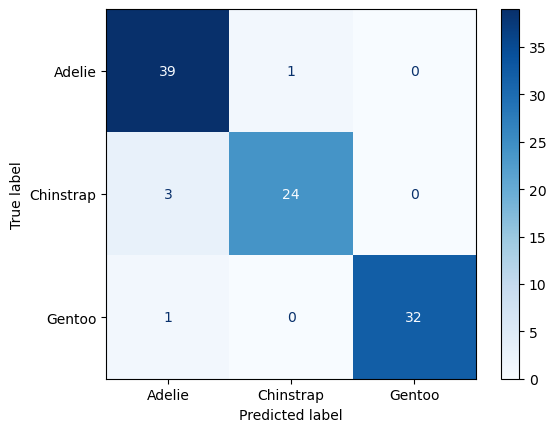

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm  = confusion_matrix(y_test,base_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Visualize the Tree

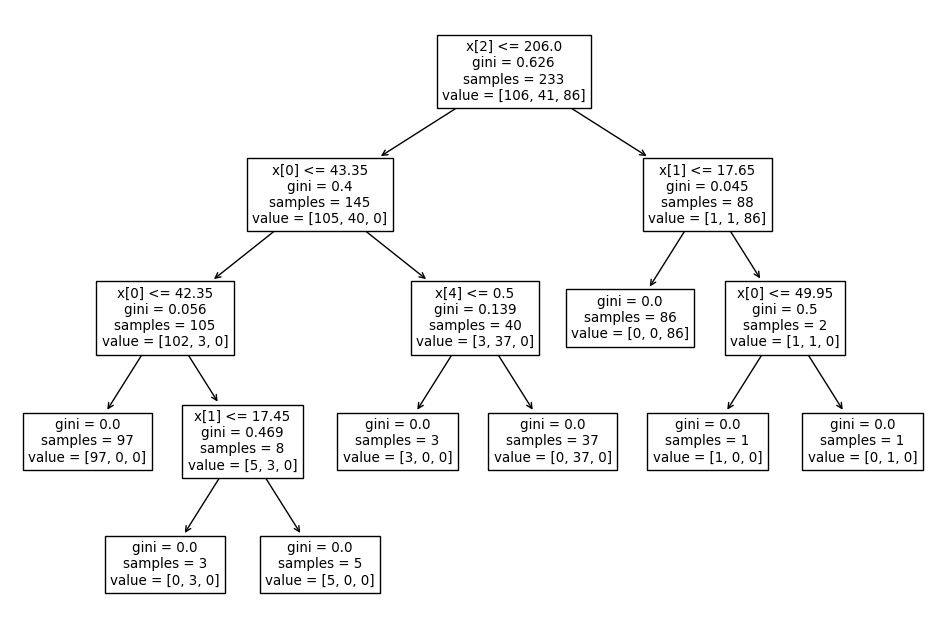

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

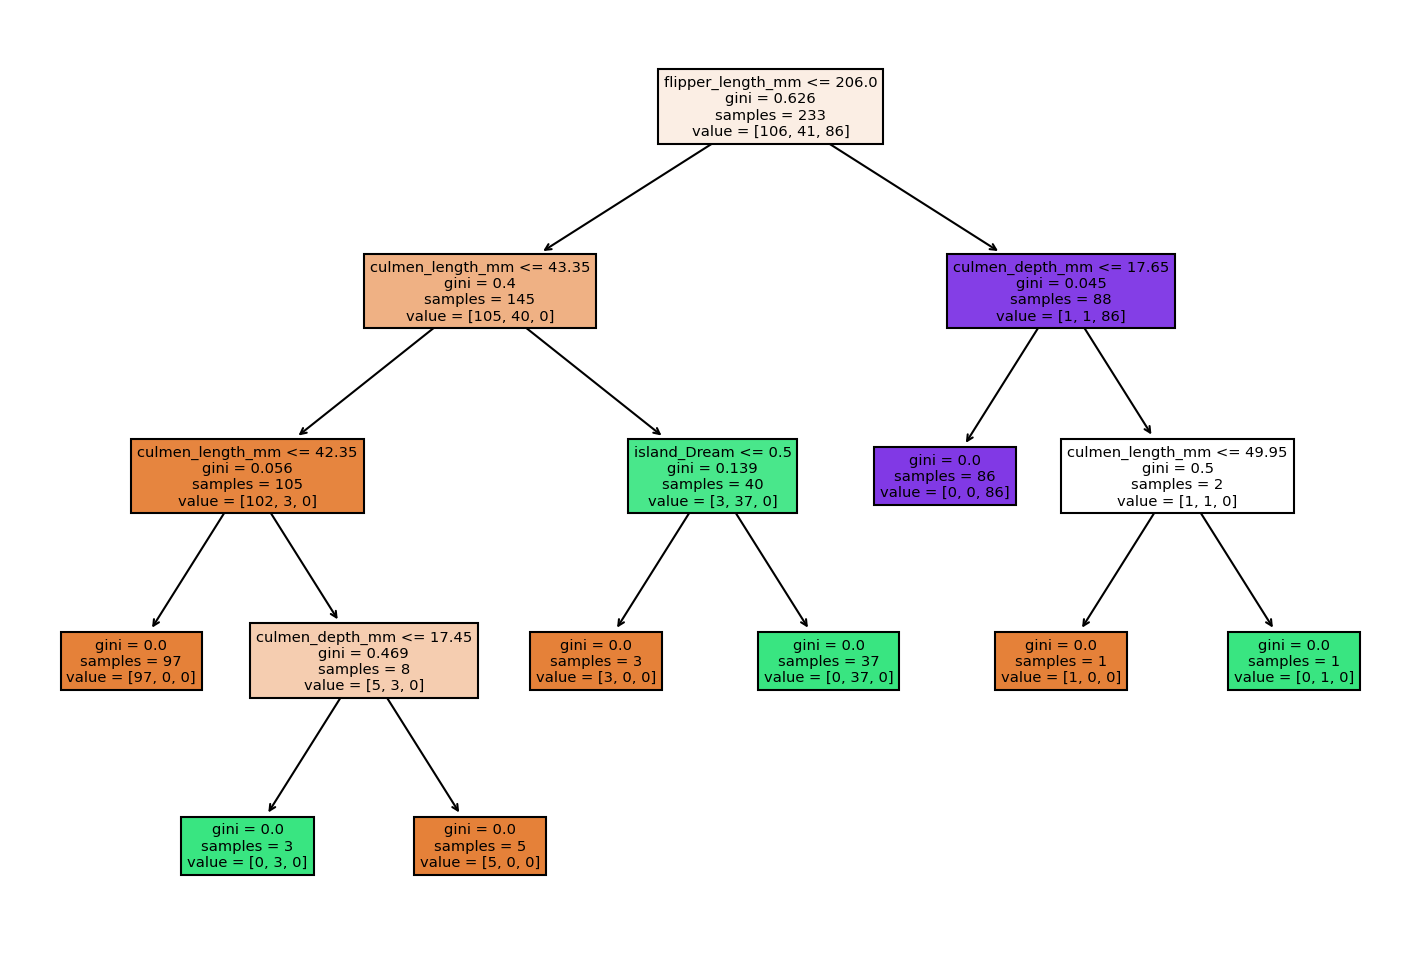

In [28]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()

# Random Forest - Classification



### Random Forests (隨機森林)
1. **多個決策樹組成**：
   - 隨機森林由多個決策樹（樹的數量稱為樹的數量）組成，每棵樹獨立生成。
   - 每棵樹只使用訓練數據的一部分（通過Bootstrap隨機抽樣）和隨機選擇的一部分特徵。

2. **集成學習方法**：
   - 隨機森林是一種集成學習方法，通過結合多個決策樹的預測結果來提高模型的準確性和穩定性。
   - 對於分類任務，隨機森林通過投票方式決定最終類別；對於回歸任務，通過平均所有樹的預測結果來獲得最終結果。

3. **抗過擬合能力強**：
   - 隨機森林由於綜合了多棵樹的預測結果，減少了單棵樹過擬合的風險，具有更好的泛化能力。
   - 通過引入隨機性來減少模型的變異性，提高了預測準確性。

### 總結
- **決策樹**適用於需要簡單解釋和快速預測的情況，但容易過擬合。
- **隨機森林**則通過多棵樹的結合，提供了更高的準確性和穩定性，適用於更複雜的問題。

這些差異使得隨機森林在實際應用中更加常用，特別是在需要高準確性和穩定性的任務中。

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("penguins_size.csv")
df = df.dropna()
df = df[df["sex"] != '.']#過濾是.的性別
X = pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y =  df["species"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators 決策樹的數量

model = RandomForestClassifier(n_estimators=100,random_state=101)
model.fit(X_train,y_train)
preds = model.predict(X_test)

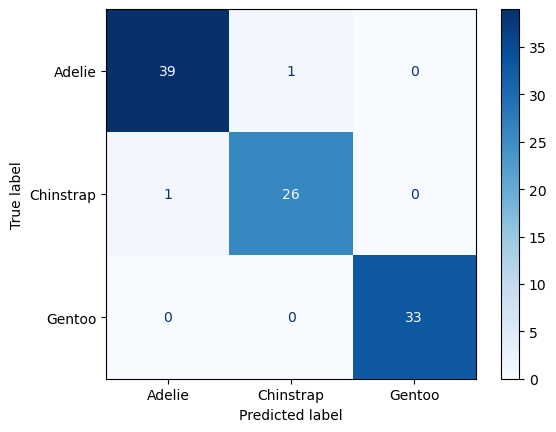

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## 資料介紹

我們剛剛被一家隧道鑽孔公司聘請，該公司使用X射線嘗試了解岩石密度，理想情況下，這將允許他們在鑽探設備之前更換鑽頭，從而提高效率！

<img src='boring.jpg' height=400>

他們給我們提供了一些實驗室測試結果，這些結果顯示了不同岩石密度類型測試時傳感器返回的信號強度（以nHz為單位）。你會注意到它幾乎具有正弦波的關係，信號強度隨密度振盪，研究人員也不確定為什麼會這樣，但

（圖片描述為隧道鑽孔的相關設備或過程，顯示了隧道鑽孔的具體情形。）

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("./rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

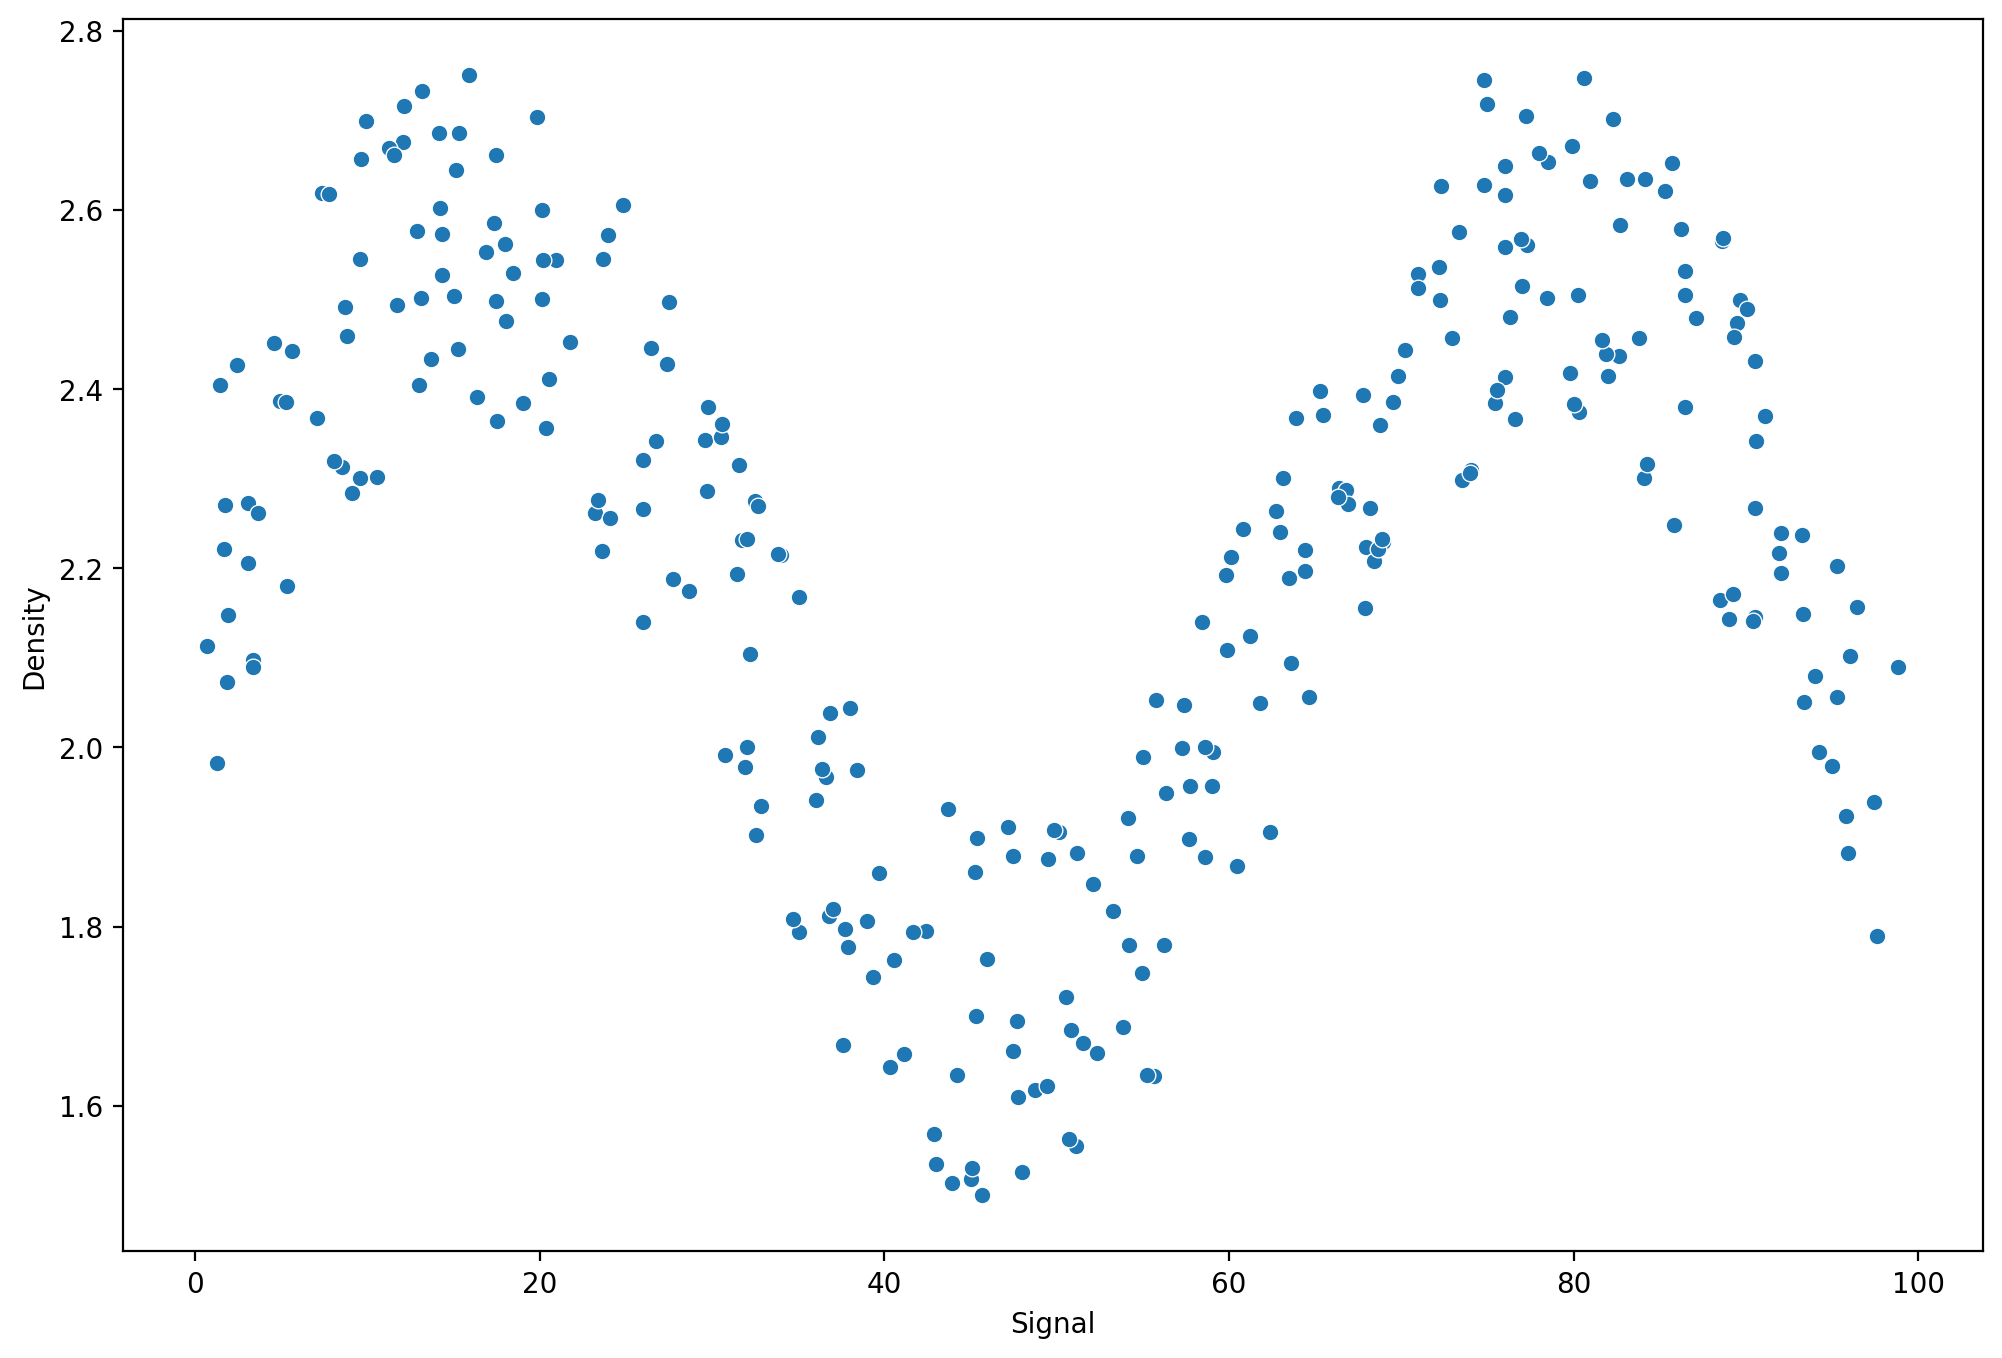

In [38]:
df.columns=['Signal',"Density"]
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [39]:
from sklearn.model_selection import train_test_split
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [40]:
from sklearn.metrics import mean_squared_error
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.13545169497601628


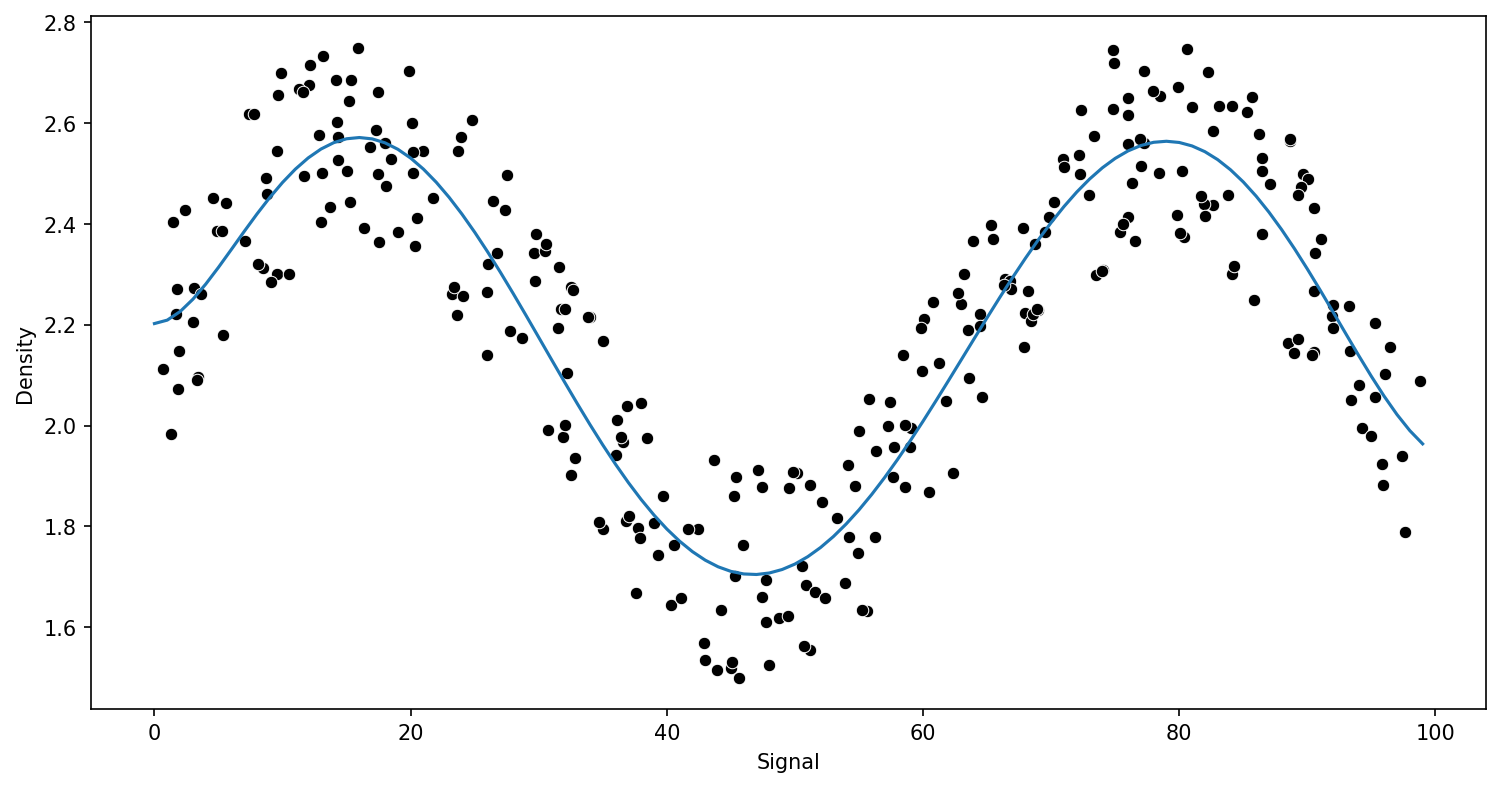

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  #多項式
pipe = make_pipeline(PolynomialFeatures(8),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.1523487028635337


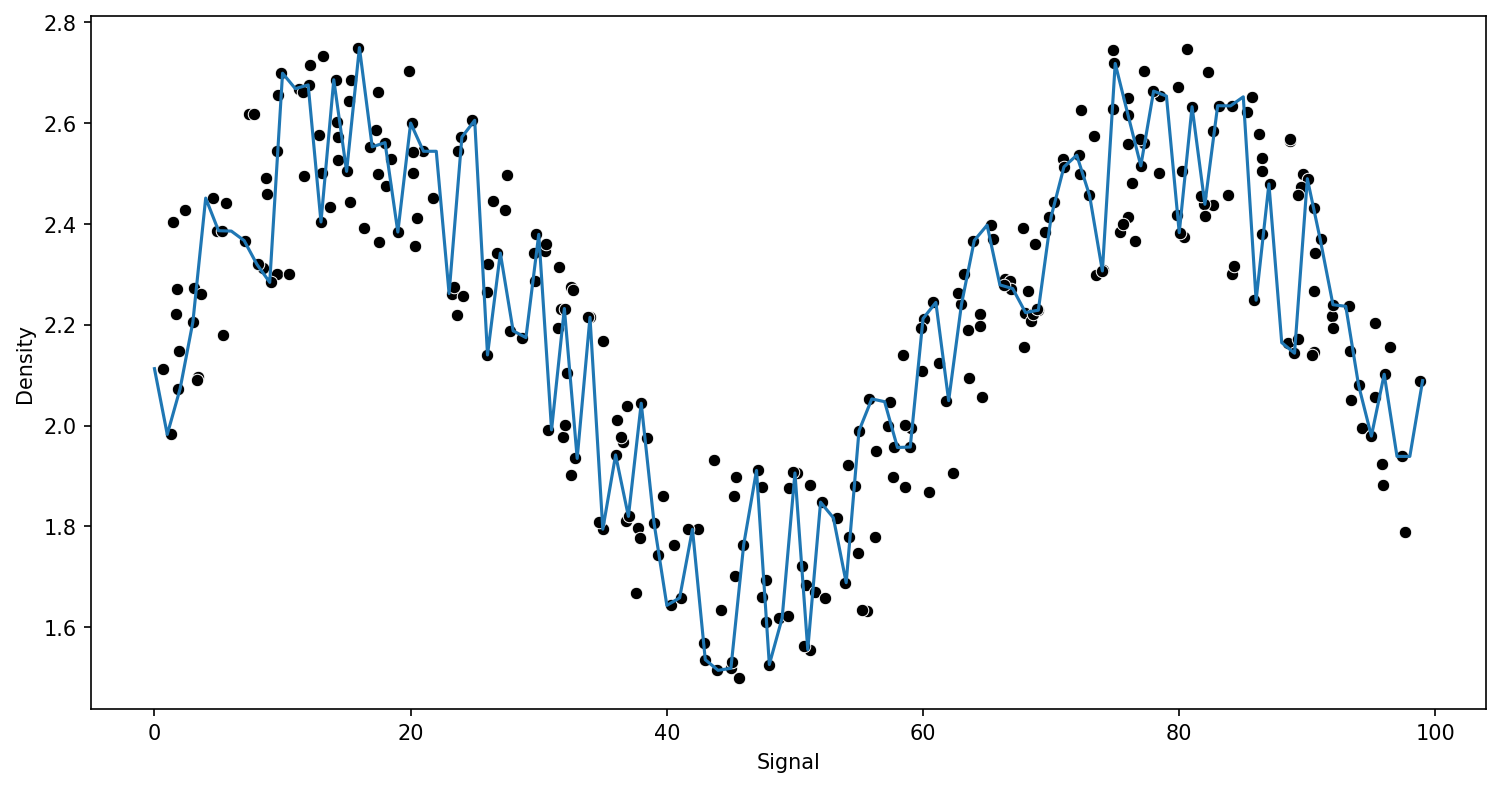

In [42]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.13059501129371875
RMSE : 0.13540120569793554
RMSE : 0.13688795930597444
RMSE : 0.1341202085662661
RMSE : 0.1357504407648806
RMSE : 0.1353414534040961
RMSE : 0.12916778132351434
RMSE : 0.13486586276393525
RMSE : 0.13351278335823422
RMSE : 0.13402552849928046


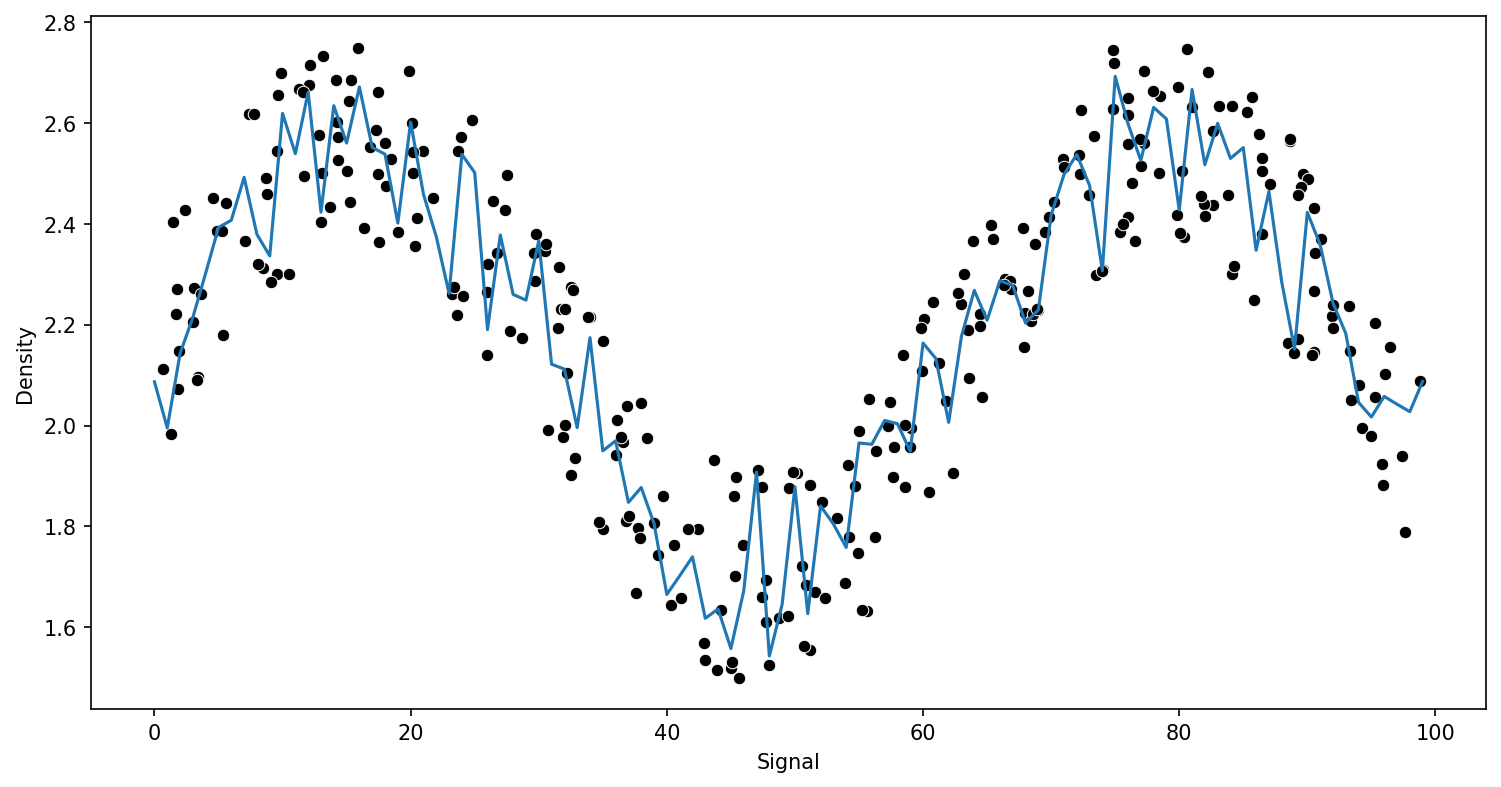

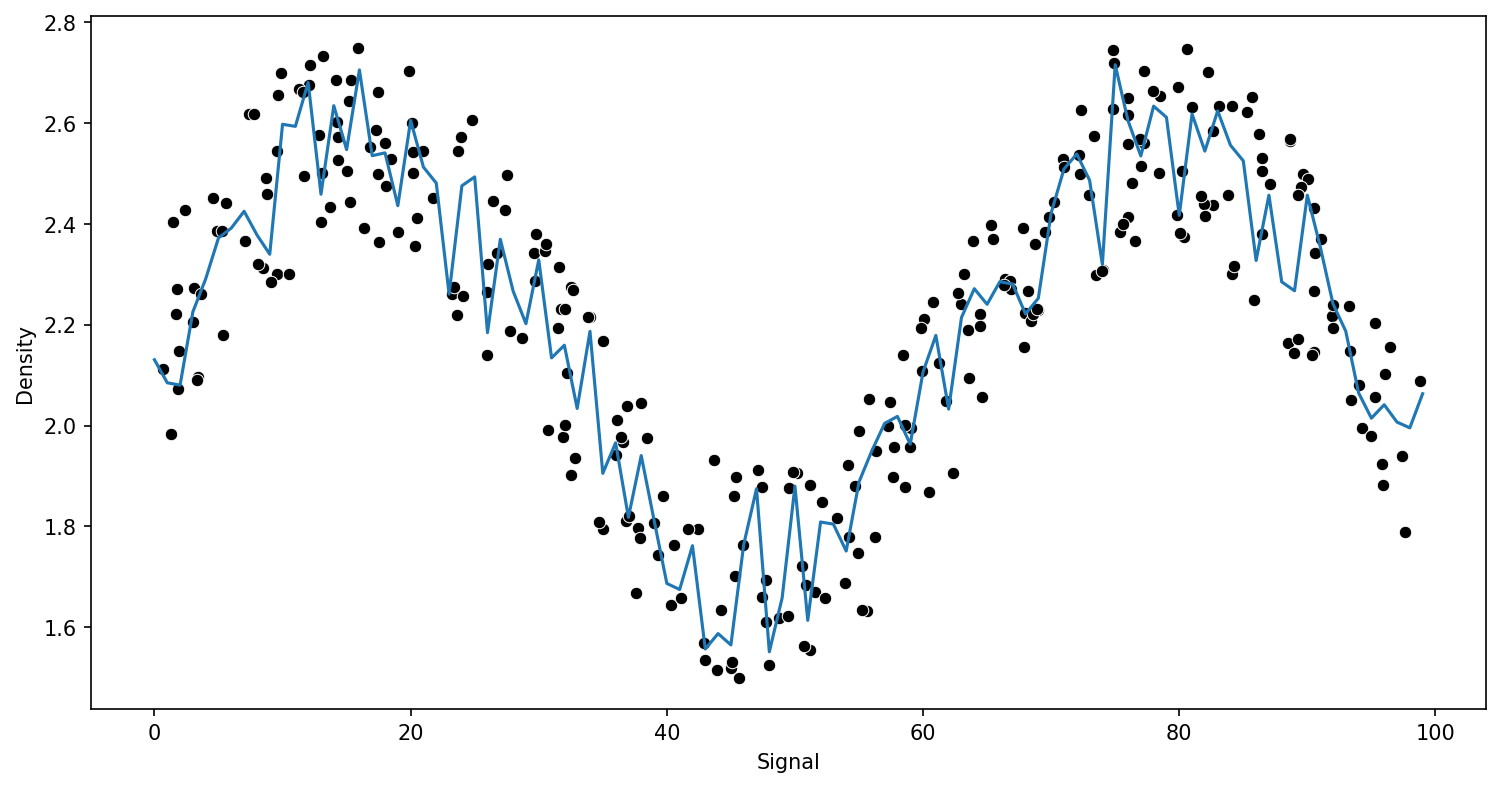

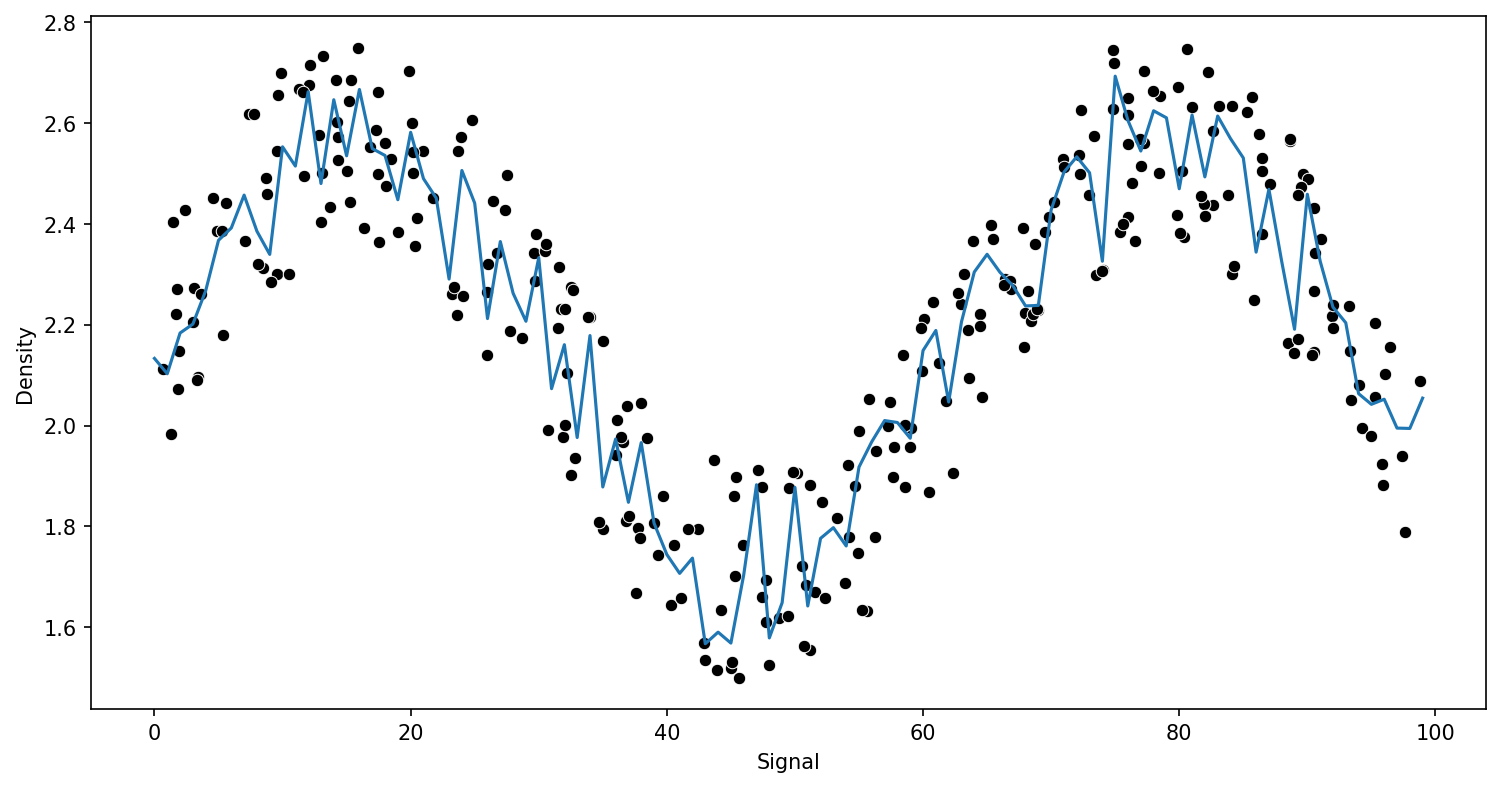

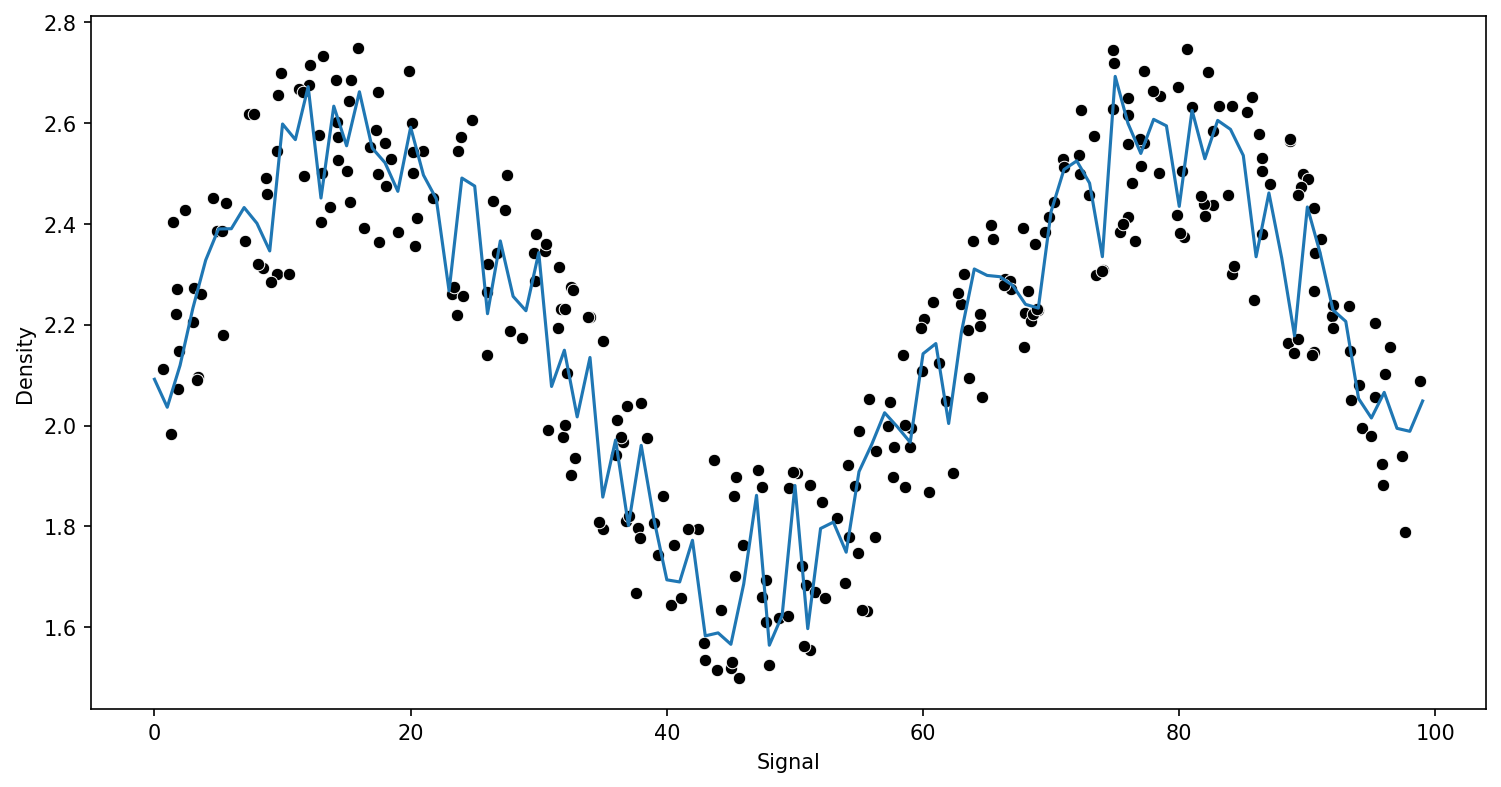

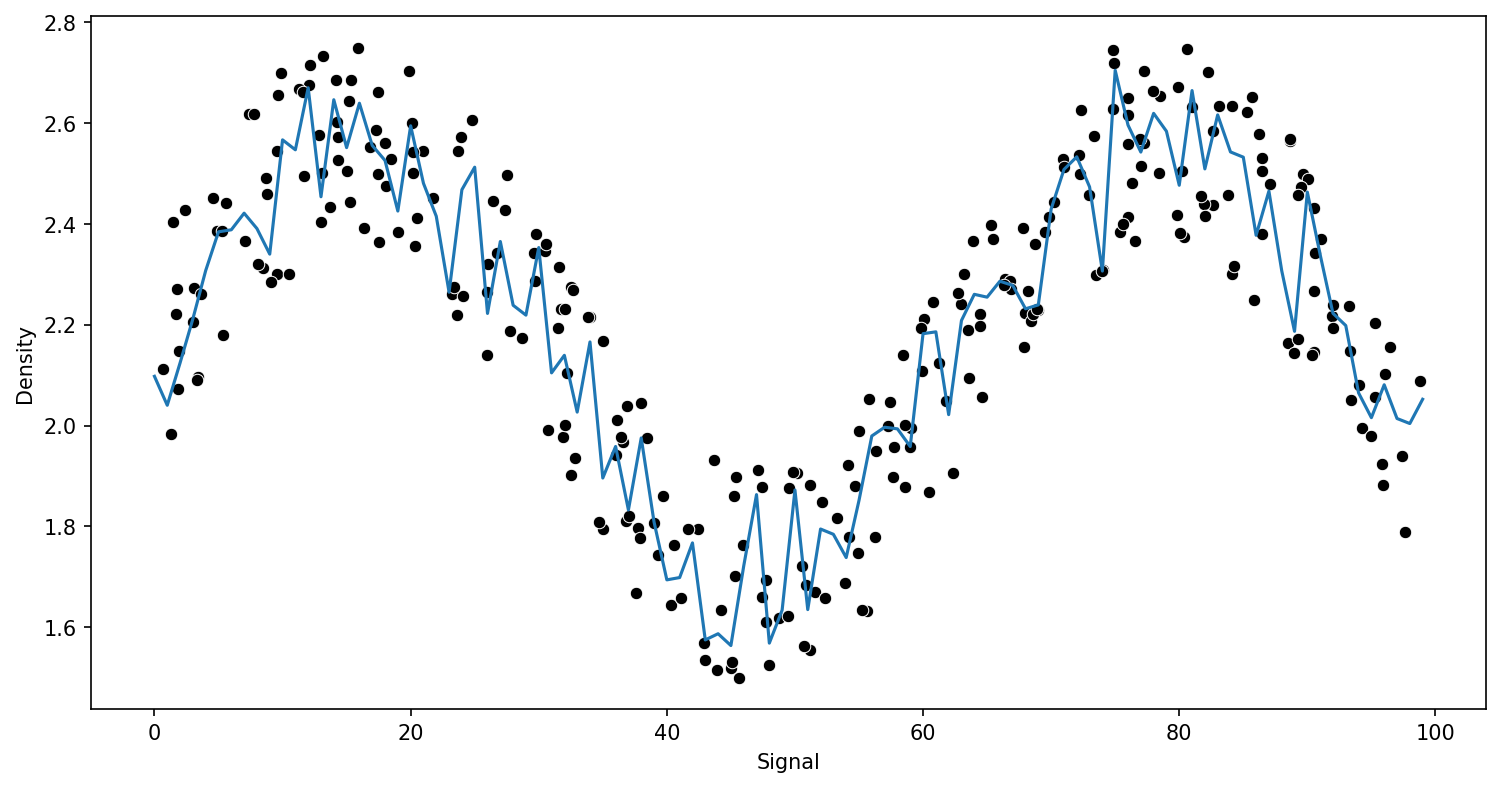

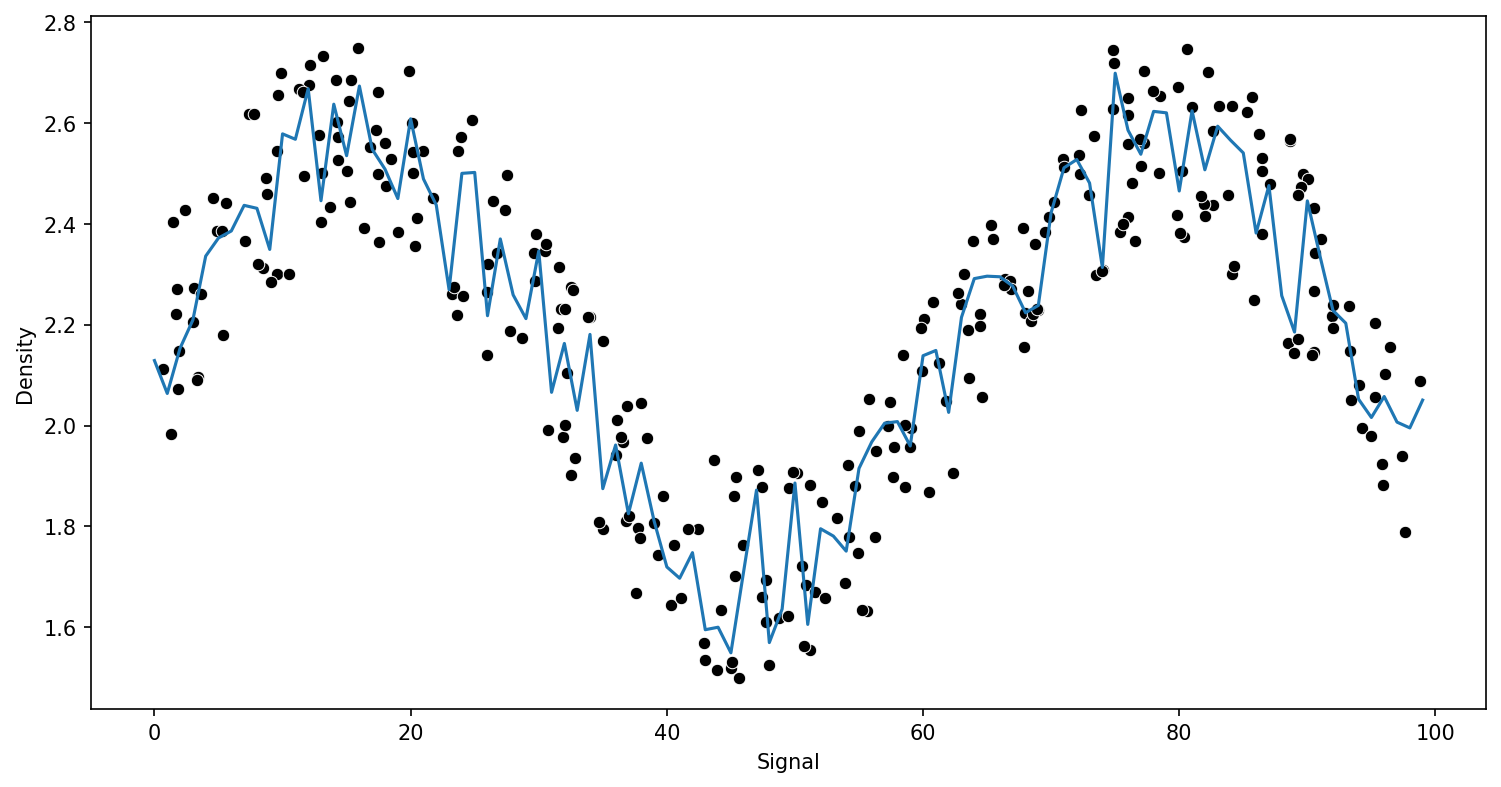

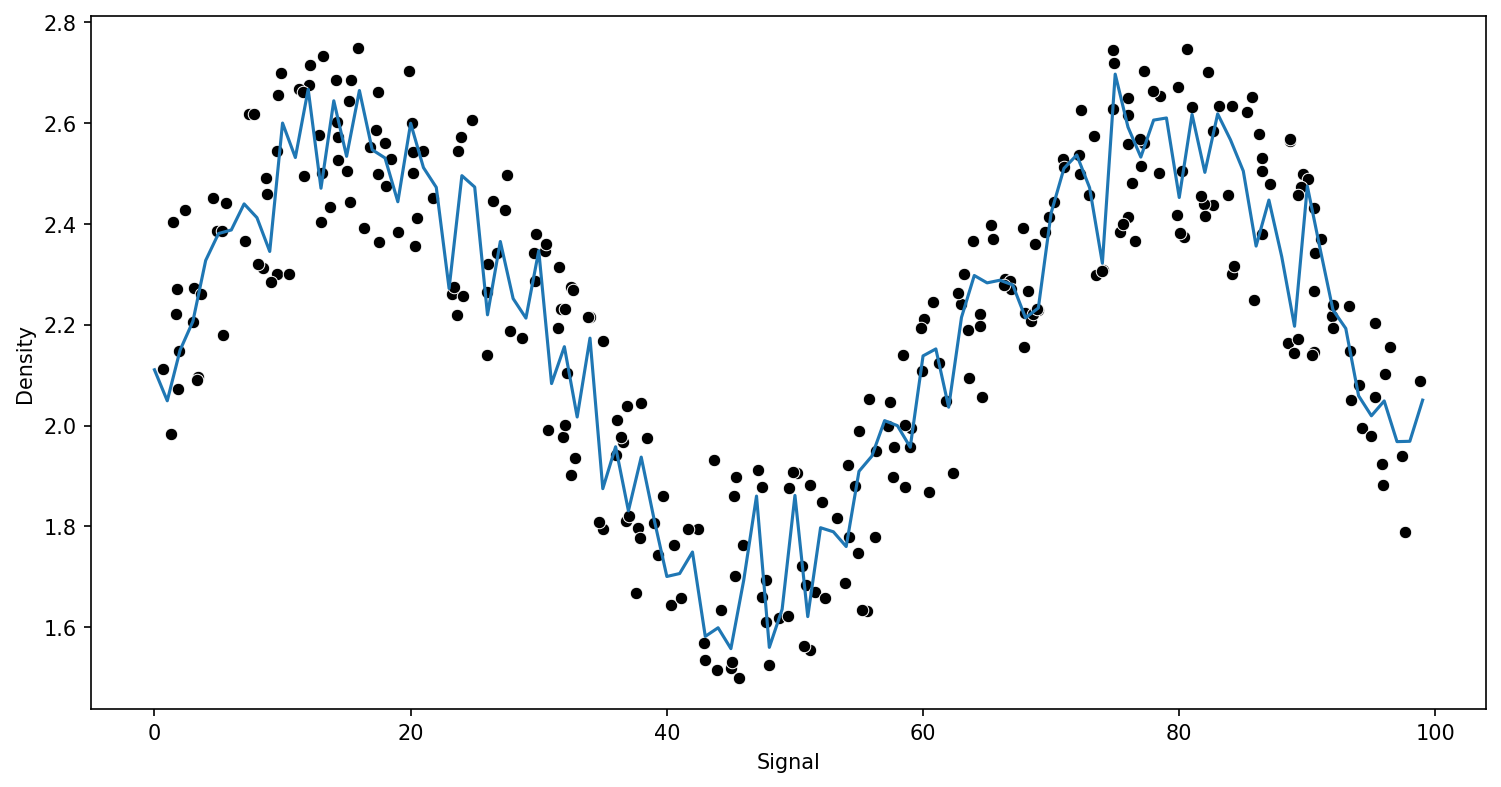

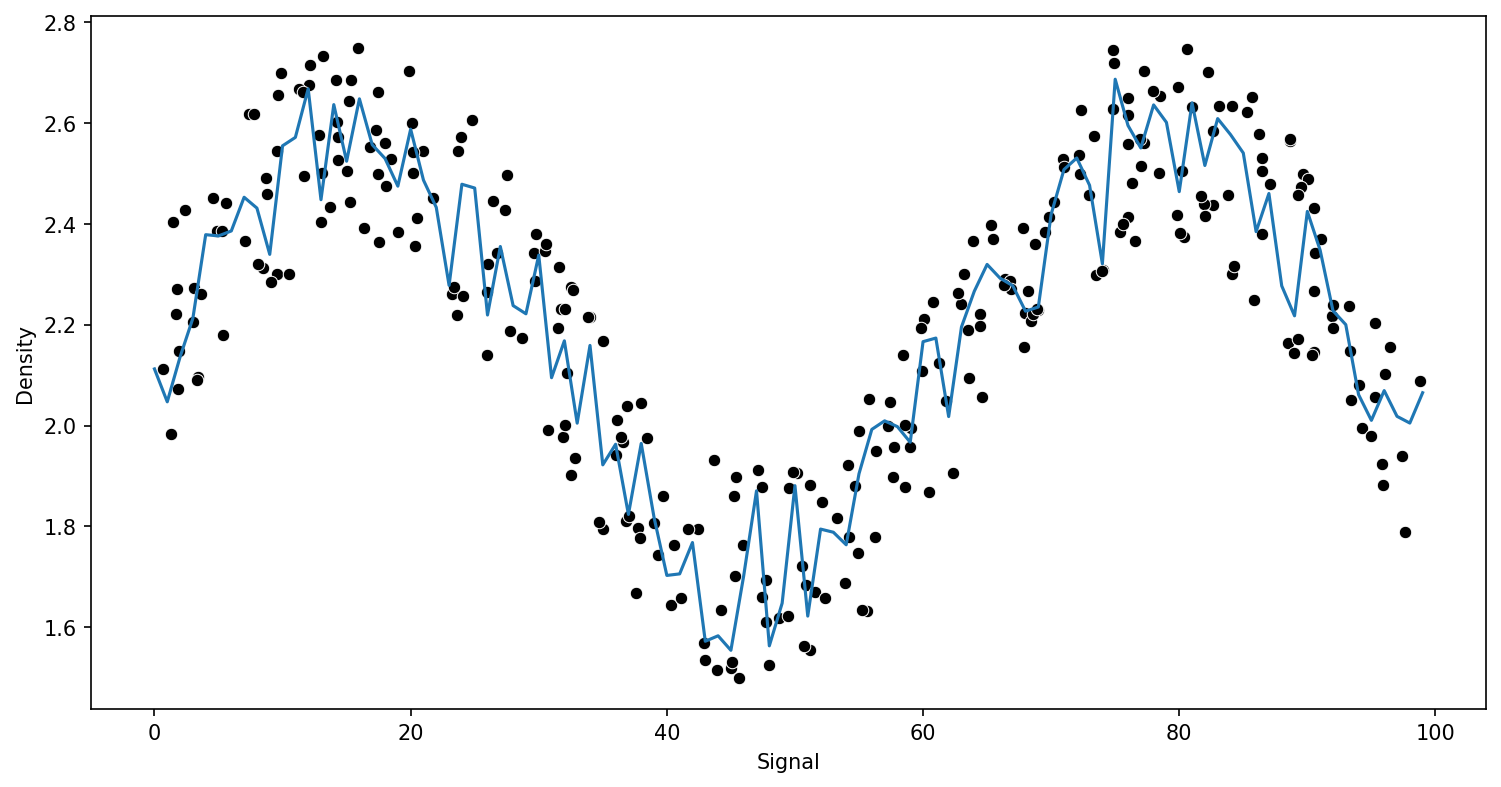

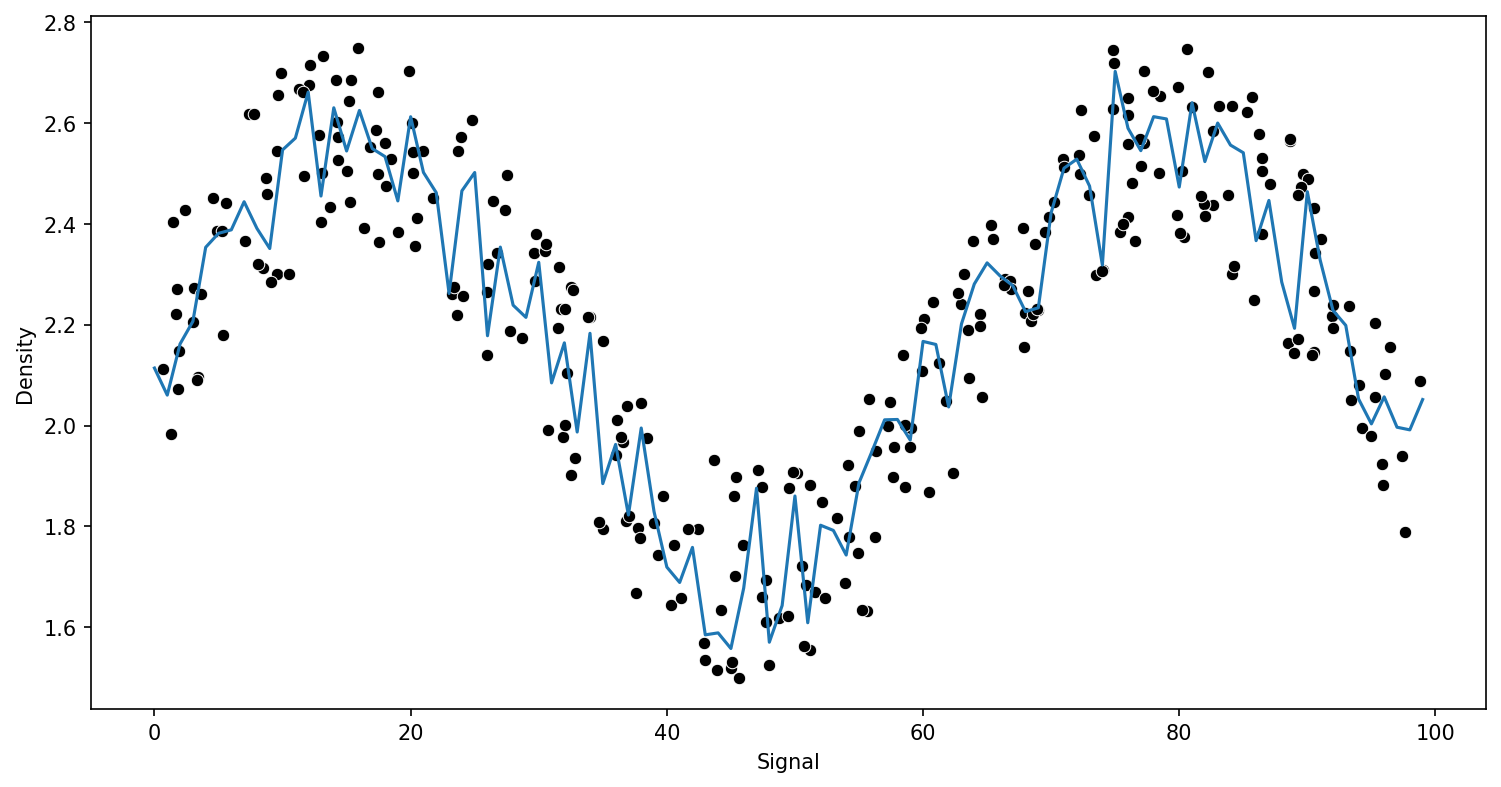

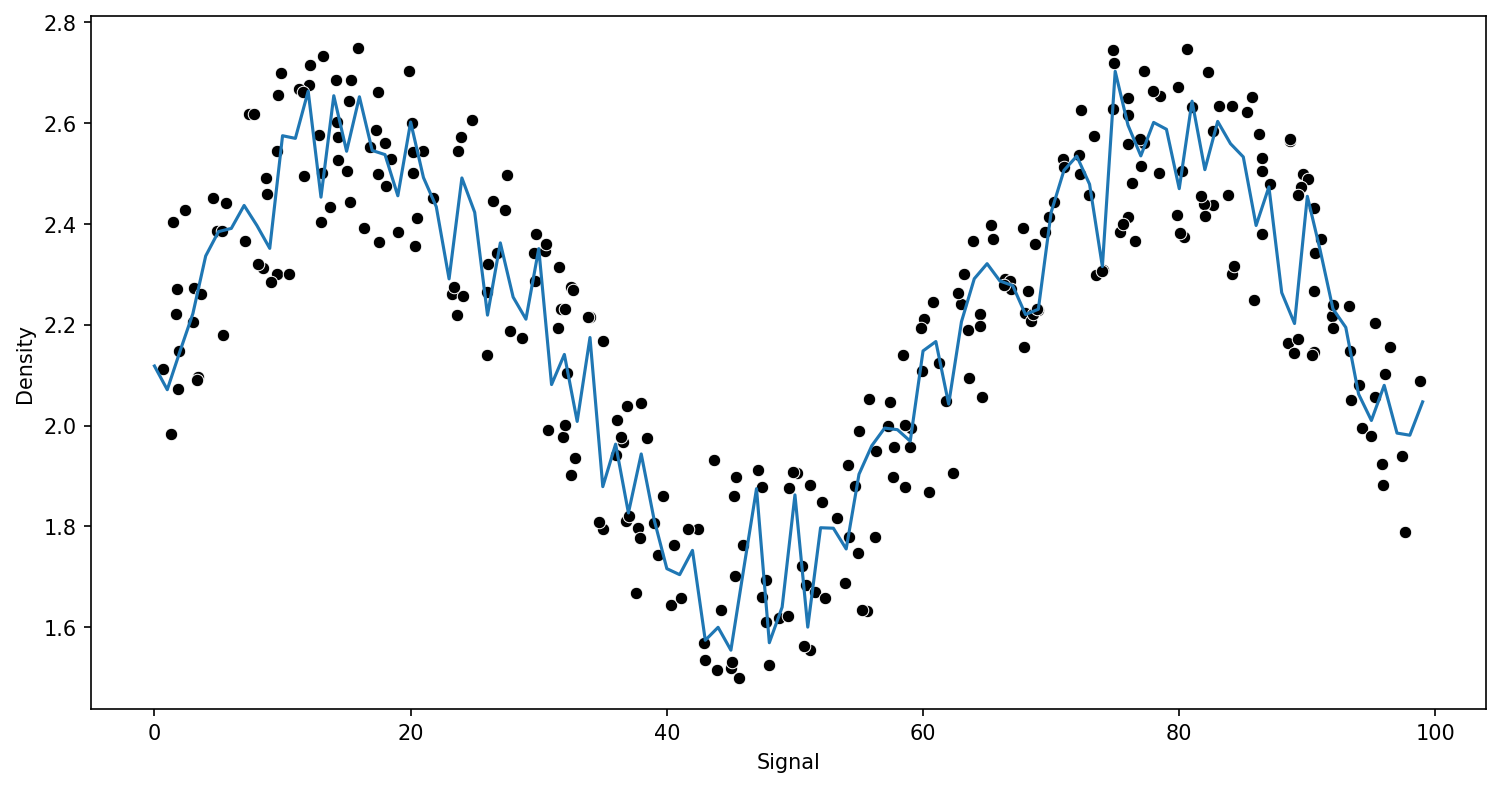

In [47]:
from sklearn.ensemble import RandomForestRegressor
trees = [10,20,30,40,50,60,70,80,90,100]
for n in trees:
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

# 時間序
# SARIMA(p,d,q)(P,D,Q)m
# 季節性自迴歸整合移動平均模型
我們終於來到時間序列分析中最有趣的部分之一：季節性。

ARIMA 接受參數 $(p,d,q)$，而 SARIMA 接受 <em>額外</em> 一組參數 $(P,D,Q)m$，這些參數專門描述模型的季節性部分。這裡的 $P$、$D$ 和 $Q$ 分別代表季節性回歸、差分和移動平均係數，$m$ 代表每個季節週期中的數據點（行）數。

pip install pmdarima

In [50]:
import pandas as pd
import numpy as np
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima #自動計算   SARIMAX 最佳參數

In [51]:
df = pd.read_csv("./co2_mm_mlo.csv")
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [52]:
df["date"] = pd.to_datetime(dict(year=df["year"],month=df["month"],day=1))
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [53]:
df.dtypes

year                     int64
month                    int64
decimal_date           float64
average                float64
interpolated           float64
date            datetime64[ns]
dtype: object

In [54]:
df.set_index("date",inplace=True)
df.index.freq = "MS"
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


[Text(0.5, 0, ''), Text(0, 0.5, 'parts per million')]

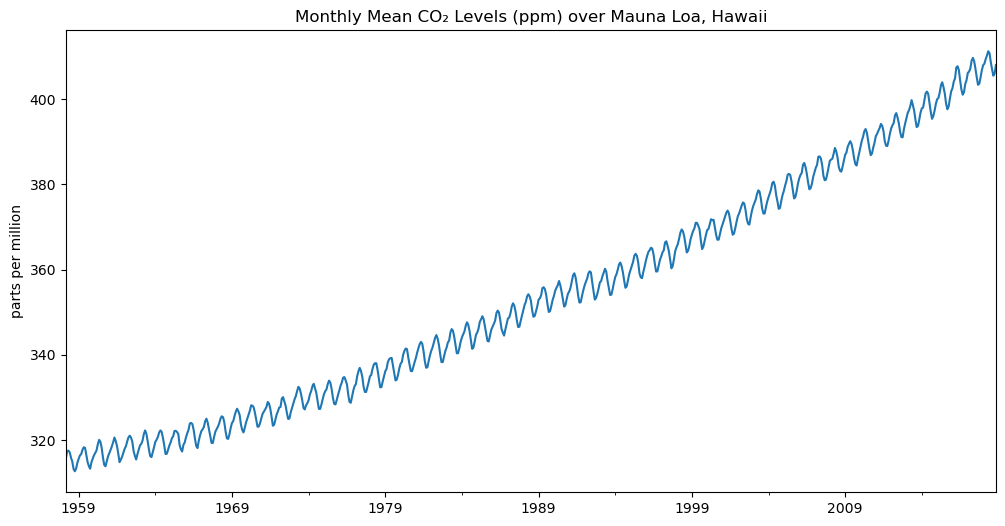

In [ ]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here
#interpolated 插值
ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

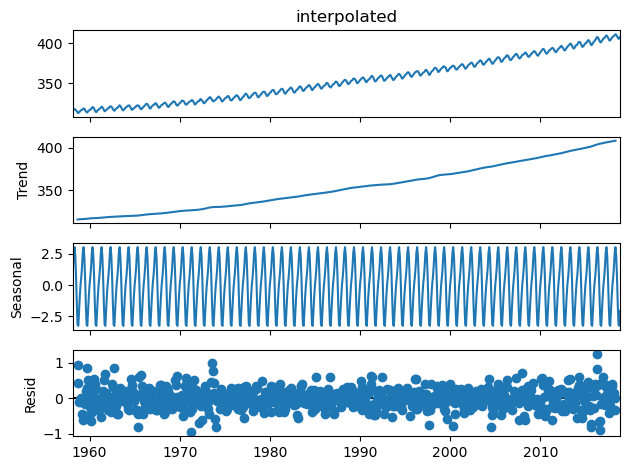

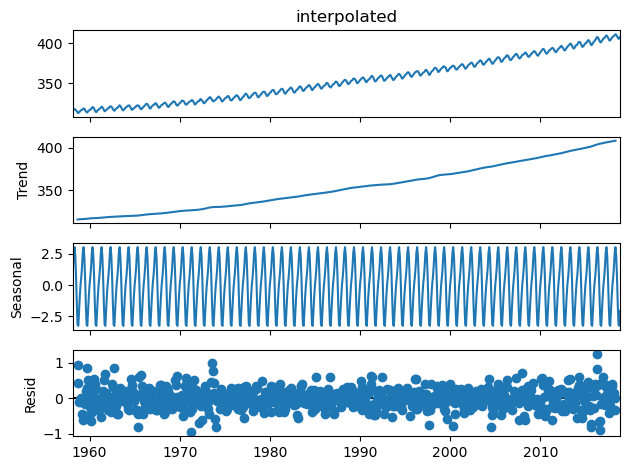

In [56]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot()

In [57]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.685
Date:                              Mon, 13 Oct 2025   AIC                            423.371
Time:                                      21:56:37   BIC                            450.913
Sample:                                  03-01-1958   HQIC                           433.998
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3564      0.036     -9.859      0.000      -0.427      -0.286
ma.L2         -0.0221      0.036     -0.607      0.544      -0.093       0.049
ma.L3         -0.0856      0.035     -2.424      0.015      -0.155      -0.016
ar.S.L12       0.9996      0.000   3138.111      0.000       0.999       1.000
ma.S.L12      -0.8672      0.021    -41.099      0.000      -0.909      -0.826
sigma2         0.0955      0.005     20.358      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.08
Prob(Q):                              0.79   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
train = df.iloc[:717]
test = df.iloc[717:]


In [59]:
model = SARIMAX(train["interpolated"],order=(0,1,3),seasonal_order=(1,0,1,12))
result = model.fit()

In [61]:
start = len(train)
end = start + len(test) - 1
predictions = result.predict(start=start,end=end,dynamic=False).rename("SARIMAX(0, 1, 3)x(1, 0, [1], 12)")

[Text(0.5, 0, ''), Text(0, 0.5, 'parts per million')]

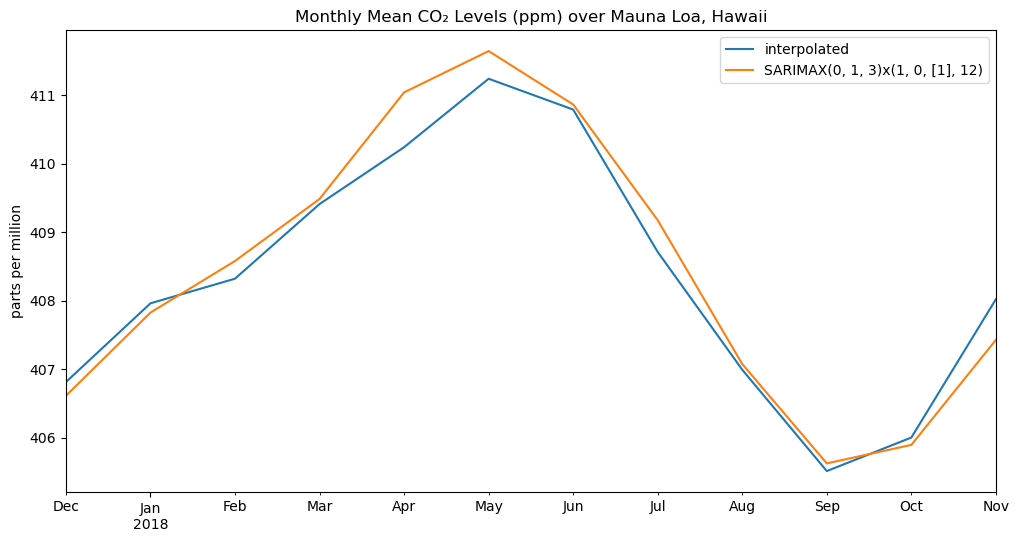

In [62]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)